# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Read in the data set.
df = pd.read_csv('ames.csv')
df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [3]:
# Clean and pre-process the data if neccessary
df.info()
df.isnull().sum()  # This checks for missing values.
'''
No data cleaning is necessary because there are no missing data values in any of the columns.
We can see below that all columns have 2930 non-null values, and all columns have the appropriate
data types.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2930 non-null   int64
 1   Year_Remod_Add  2930 non-null   int64
 2   Total_Bsmt_SF   2930 non-null   int64
 3   First_Flr_SF    2930 non-null   int64
 4   Second_Flr_SF   2930 non-null   int64
 5   Gr_Liv_Area     2930 non-null   int64
 6   Full_Bath       2930 non-null   int64
 7   Half_Bath       2930 non-null   int64
 8   Bedroom_AbvGr   2930 non-null   int64
 9   Kitchen_AbvGr   2930 non-null   int64
 10  TotRms_AbvGrd   2930 non-null   int64
 11  Fireplaces      2930 non-null   int64
 12  Garage_Area     2930 non-null   int64
 13  Sale_Price      2930 non-null   int64
dtypes: int64(14)
memory usage: 320.6 KB


'\nNo data cleaning is necessary because there are no missing data values in any of the columns.\nWe can see below that all columns have 2930 non-null values, and all columns have the appropriate\ndata types.\n'

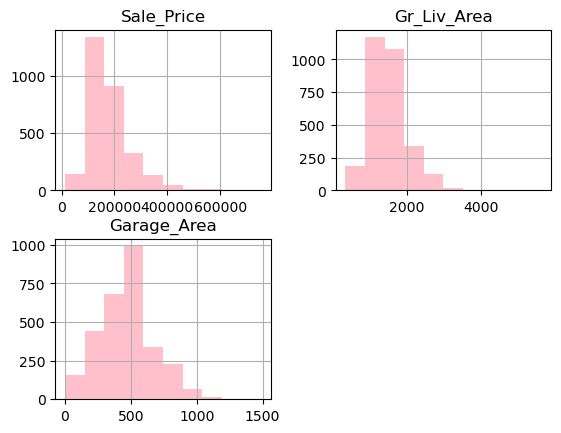

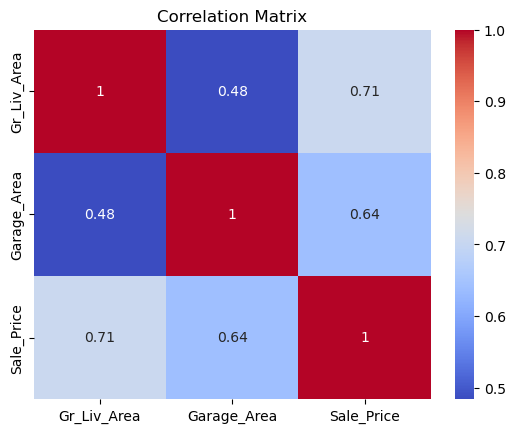

'\nThese visualisations show us that there is a strong correlation between Gr_Liv_Area and Sale_Price, \nwhich tells us that larger living areas increase the sales price of a house. Garage_Area shows a \nmoderate correlation with Sale_Price which indicates houses with larger garages sell for higher prices.\nLastly, these visuals tell us that Gr_Liv_Area and Garage_Area have a low correlation.\n\n'

In [4]:
# Explore the data with visualisations such as histograms and correlation matrices.
# Histograms.
df[['Sale_Price', 'Gr_Liv_Area', 'Garage_Area']].hist(color='pink')
plt.show()

# Correlation matrices.
sns.heatmap(df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

'''
These visualisations show us that there is a strong correlation between Gr_Liv_Area and Sale_Price, 
which tells us that larger living areas increase the sales price of a house. Garage_Area shows a 
moderate correlation with Sale_Price which indicates houses with larger garages sell for higher prices.
Lastly, these visuals tell us that Gr_Liv_Area and Garage_Area have a low correlation.

'''

In [5]:
# Split the independent variables from the dependent variable.
X = df[['Gr_Liv_Area', 'Garage_Area']]
y = df['Sale_Price']

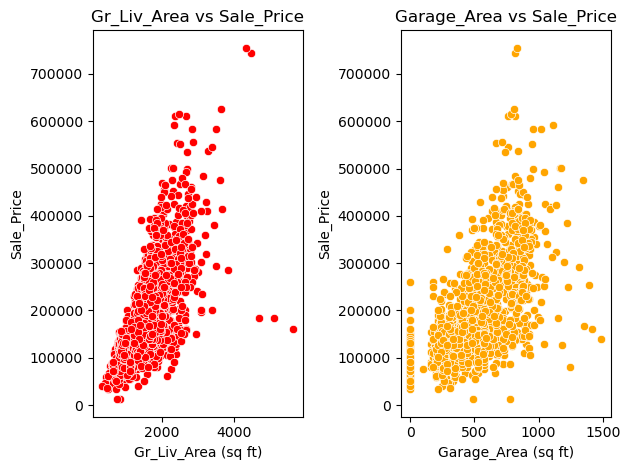

In [6]:
# Explore relationships between the independent and dependent variables.
# Gr_Liv_Area vs Sale_Price.
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Gr_Liv_Area'], y=df['Sale_Price'], color='red')
plt.title('Gr_Liv_Area vs Sale_Price')
plt.xlabel('Gr_Liv_Area (sq ft)')
plt.ylabel('Sale_Price')

# Garage_Area vs Sale_Price.
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Garage_Area'], y=df['Sale_Price'], color='orange')
plt.title('Garage_Area vs Sale_Price')
plt.xlabel('Garage_Area (sq ft)')
plt.ylabel('Sale_Price')

plt.tight_layout()
plt.show()

In [7]:
# Create a training and test set with a 75:25 split ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Print the model intercept and coefficients.
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -5059.448195610486
Coefficients: [ 78.69286848 141.14571761]


In [10]:
# Generate predictions for the test set.
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model by computing the MSE and RMSE.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 2634371879.6902103
RMSE: 51326.13252223676


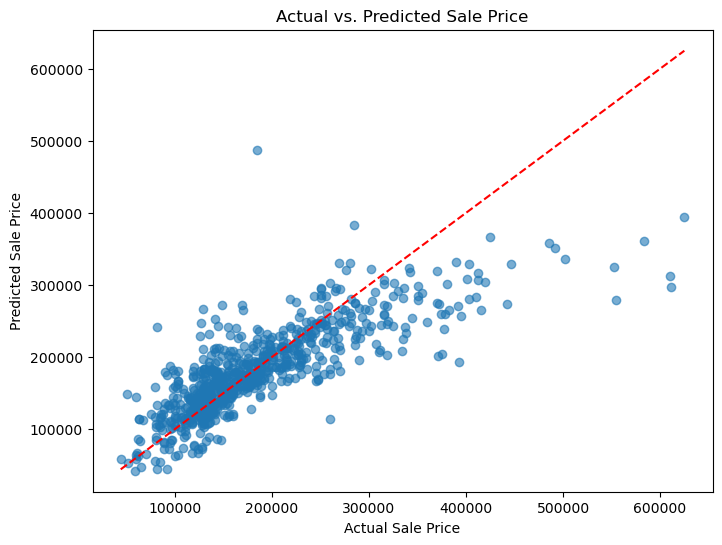

In [12]:
# Generate an error plot.

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Price")
plt.show()

In [13]:
# Compute the median values for the independent variables
median_values = X.median()

# Predict the sale price using the median values
median_prediction = model.coef_[0] * median_values['Gr_Liv_Area'] + model.coef_[1] * median_values['Garage_Area']

# Print coefficients and the median prediction
print("Coefficient for Gr_Liv_Area:", model.coef_[0])
print("Coefficient for Garage_Area:", model.coef_[1])
print("Predicted Sale Price (using median values):", median_prediction)

Coefficient for Gr_Liv_Area: 78.6928684812141
Coefficient for Garage_Area: 141.1457176087721
Predicted Sale Price (using median values): 181225.06080212136


**Interpret coefficients in the context of the prediction:**
Coefficient for Gr_Liv_Area: This indicates that for every additional square foot of above grade living space, the houses sales price is expected to increase by 78.69 units.

Coefficient for Garage_Area: This indicates that for every additional square foot of garage area adds 141.15 units to the expected sale price.

Predicted Median Sale Price: This indicates the estimated sale price for a house that has the median values for both living area and garage size.

These values show us that buyers may value garage space more highly compared to living area. 

**Summarise findings**
Exploratory Data Analysis:
The histograms of Sale_Price, Gr_Liv_Area and Garage_Area are all right-skewed distributions. This indicates the presence of higher value houses in the dataset. There are outliers which show us there is a broad spread within the housing market.

The correlation matrix shows us a strong positive correlation between Gr_Liv_Area and Sale_Price, a moderate positive correlation between Garage_Area and Sale_Price and lastly, a low correlation between Gr_Liv_Area and Garage_Area.

Model Performance:
The linear regression model produced coefficients of 78.69 per additional square foot for Gr_Liv_Area and 141.15 per additional square foot for Garage_Area. This tells us that buyers prefer garage space more than living area.

The Mean Squared Error (MSE) is 2634371879.69 and the Root Mean Squared Error (RMSE) is 51326.13.

The scatterplot of actual vs predicted sales prices shows us the model aligns well with the diagonal as many of the dots fall close to the diagonal. This indicates that for these houses, the predicted sales prices closely match the actaul prices. Deviations also exist for higher value houses.

Other Observations:
The predicted median sale price is 181 225.06 units for a house with median living area and garage size values.